In [5]:
import numpy as np
from cztRoutines import *
import matplotlib.pyplot as plt

# What is the proper way of reconstructing the complex values from a tone's spectrum?

Here we outline the likely overlooked nuances of defining a closed-form equation for the spectrum of a given tone. Given a complex tone with frequency $f_0$ and amplitude $A$, with constant offset phase $\phi_0$ - that is, the tone typically given by

$$ x(t) = \exp(i 2 \pi f_0 t) \exp(i \phi)$$

what is the value of the spectrum formed by the _sampled_ tone at some point corresponding to $f$? If the first answer that comes to mind is that of the well known $sinc$ function, then one would only be half right. Here's the issue:

In [2]:
fs = 100.0
N = 100
f0 = 25.0
phi0 = 0.0
x = np.exp(1j*2*np.pi*f0*np.arange(N)/fs) * np.exp(1j*phi0)

fstep = 0.1
frange = 10.0
freqs = np.arange(f0-frange,f0+frange,fstep)

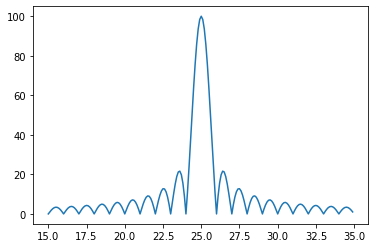

In [6]:
spectrum = dft(x,freqs,fs)
plt.plot(freqs, np.abs(spectrum))

All good so far. The plot obeys our well known $sinc$ function. As a primer, this is usually derived by considering how the windowing caused by taking a finite number of samples is equivalent to multiplication by a $rect$ function in time. Then by invoking convolution rules, we can show that this is equivalent to convolving with a $sinc$ (which is a Fourier transform of a $rect$) in frequency.

$$\mathcal{F}\{x(t) rect(t)\} = \mathcal{F}\{x(t)\} * \mathcal{F}\{rect(t)\}$$

Fourier transform of the tone $x(t)$ is a $\delta(f-f_0)$ function, so convolution over it produces the $sinc$ shape centred at $f_0$ as expected. The $sinc$ is _very typically_ derived like so:

$$
\begin{aligned}
\mathcal{F}\{rect(t)\} &= \int_{-\tau/2}^{\tau/2} \exp{-i 2 \pi f t} dt\\
&= \tau \frac{\sin(\pi f \tau)}{\pi f \tau} \\
&= \tau sinc(f \tau)
\end{aligned}
$$

In other words, the $sinc$ envelope's max amplitude is given by the window length; in discrete terms, this equates to the number of samples, so we can write?

$$ N sinc(f N) $$